In [1]:
# Intall any libraries and modules needed
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 53.7MB 599kB/s
     |████████████████████████████████| 81kB 4.9MB/s 
     |████████████████████████████████| 604kB 9.2MB/s 
     |████████████████████████████████| 3.1MB 15.7MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 296kB 45.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=239950 sha256=9c24286b4ef7478cb1ccc7503b0afe42fc7ebcbf060590e7597ee5e7b4981971
  Stored in directory: /tmp/pip-ephem-wheel-cache-gr1b6932/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=ed2620be6b4ca1a86ed262a5e52d1946c7f92e07344279086cde42467c7fc6e1
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling htmlmin
ERROR: google-colab 1.0.0 has requirement 

In [21]:
# -*- coding: utf-8 -*-
"""==============================================================================

 Title          :
 Description    :
 Author         :
 Date           :
 Version        :
 Usage          :
 Notes          : 
 python version :

=============================================================================="""

# =============================================================================
# Modules - Libraries
# =============================================================================

# DEA
%load_ext google.colab.data_table
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

# graphical presentation
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# Functions
# =============================================================================
def distrib_plot(plot_title, x_column, kde_value):
  # Distribution
  plot_dims = (12,6)
  dist_fig, axes = plt.subplots(1,2, constrained_layout=True, figsize=plot_dims)

  dist_fig.suptitle(plot_title)
  axes[0].set_title('Training')
  axes[1].set_title('Test')

  sns.histplot(data=dat_trn, x=x_column, ax = axes[0], stat='count', kde=kde_value)
  sns.histplot(data=dat_tst, x=x_column, ax = axes[1], stat='count', kde=kde_value)

# =============================================================================
# Global variables
# =============================================================================
prt_sep = '-'*40
# loading data from GitHub
url_trn = 'https://raw.githubusercontent.com/GeoFelpave/LuisFPVelasquez_titanic/main/train.csv'
dat_trn = pd.read_csv(url_trn)
url_tst = 'https://raw.githubusercontent.com/GeoFelpave/LuisFPVelasquez_titanic/main/testdata_with_groundTruth.csv'
dat_tst = pd.read_csv(url_tst)


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# **Data Undestanding**

## **Inspecting the records and attributes characteristics for traning and test data**

In [3]:
# number of records and attributes in each dataset
print('Total number of records in training data: {}'.format(dat_trn.shape[0]))
print('Total number of attributes in training data: {}'.format(dat_trn.shape[1]))
print(prt_sep)
print('Total number of records in test data: {}'.format(dat_tst.shape[0]))
print('Total number of attributes in test data: {}'.format(dat_tst.shape[1]))
print(prt_sep)
print('Attributes in training data: {}'.format(dat_trn.columns.values))
print('Attributes in test data: {}'.format(dat_tst.columns.values))

Total number of records in training data: 891
Total number of attributes in training data: 12
----------------------------------------
Total number of records in test data: 418
Total number of attributes in test data: 12
----------------------------------------
Attributes in training data: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Attributes in test data: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### **Checking training and test data information**

As part of this section I am looking at the ***summary statistics*** as well as the ***graphical presentation*** of the data

In [4]:
# preview training data
print('TRAINING DATA')
dat_trn


TRAINING DATA


PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]

In [5]:
print('TEST DATA')
dat_tst


TEST DATA


PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
0            892         0       3  ...    7.8292   NaN         Q
1            893         1       3  ...    7.0000   NaN         S
2            894         0       2  ...    9.6875   NaN         Q
3            895         0       3  ...    8.6625   NaN         S
4            896         1       3  ...   12.2875   NaN         S
..           ...       ...     ...  ...       ...   ...       ...
413         1305         0       3  ...    8.0500   NaN         S
414         1306         1       1  ...  108.9000  C105         C
415         1307         0       3  ...    7.2500   NaN         S
416         1308         0       3  ...    8.0500   NaN         S
417         1309         1       3  ...   22.3583   NaN         C

[418 rows x 12 columns]

In [6]:
print('\nTraining data info below:\n')
dat_trn.info()

print(prt_sep)
print(prt_sep)
print(prt_sep)

print('\nTest data info below:\n')
dat_tst.info()


Training data info below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
----------------------------------------
----------------------------------------

Test data info below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 4

### **Summary Statistics**
- Numerical Data

In [7]:
print('TRAINING DATA')
dat_trn.describe().T


TRAINING DATA


count        mean         std  ...       50%    75%       max
PassengerId  891.0  446.000000  257.353842  ...  446.0000  668.5  891.0000
Survived     891.0    0.383838    0.486592  ...    0.0000    1.0    1.0000
Pclass       891.0    2.308642    0.836071  ...    3.0000    3.0    3.0000
Age          714.0   29.699118   14.526497  ...   28.0000   38.0   80.0000
SibSp        891.0    0.523008    1.102743  ...    0.0000    1.0    8.0000
Parch        891.0    0.381594    0.806057  ...    0.0000    0.0    6.0000
Fare         891.0   32.204208   49.693429  ...   14.4542   31.0  512.3292

[7 rows x 8 columns]

In [8]:
print('TEST DATA')
dat_tst.describe().T

TEST DATA


count         mean         std  ...        50%      75%        max
PassengerId  418.0  1100.500000  120.810458  ...  1100.5000  1204.75  1309.0000
Survived     418.0     0.377990    0.485466  ...     0.0000     1.00     1.0000
Pclass       418.0     2.265550    0.841838  ...     3.0000     3.00     3.0000
Age          332.0    30.272590   14.181209  ...    27.0000    39.00    76.0000
SibSp        418.0     0.447368    0.896760  ...     0.0000     1.00     8.0000
Parch        418.0     0.392344    0.981429  ...     0.0000     0.00     9.0000
Fare         417.0    35.627188   55.907576  ...    14.4542    31.50   512.3292

[7 rows x 8 columns]

- Categorical Data

In [9]:
print('TRAINING DATA')
dat_trn.describe(include=['O']).T

TRAINING DATA


count unique               top freq
Name       891    891  Blank, Mr. Henry    1
Sex        891      2              male  577
Ticket     891    681              1601    7
Cabin      204    147       C23 C25 C27    4
Embarked   889      3                 S  644

In [10]:
print('TEST DATA')
dat_tst.describe(include=['O']).T

TEST DATA


count unique                          top freq
Name       418    418  Rosblom, Miss. Salli Helena    1
Sex        418      2                         male  266
Ticket     418    363                     PC 17608    5
Cabin       91     76              B57 B59 B63 B66    3
Embarked   418      3                            S  270

- Create a comple report of the Exploratory Data Analysis

In [11]:
# using the train data
dat_trn.profile_report()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## From the data inspection:

* Training data:
  - There are 891 records (passengers) with 12 descriptive attributes, including the outcome feature (*Survived*)
  - *Name, Sex, Ticket, Cabin and Embarked* are categorical attributes
  - *PassengerId, Pclass, Age, SibSp, Parch and Fare* are numerical attributes
  - The attributes *Name, Cabin and PassengerId have a high variability, that is a high number of unique values for the first two and high SD for the last
  - *Age, Cabin and Embarked* attributes have NULL values.

* Test data
  - There are 418 records (passengers) with 12 descriptive attributes, including the outcome feature (*Survived*)
  - *Name, Sex, Ticket, Cabin and Embarked* are categorical attributes
  - *PassengerId, Pclass, Age, SibSp, Parch and Fare* are numerical attributes
  - The attributes *Name, Cabin and PassengerId have a high variability, that is a high number of unique values for the first two and high SD for the last
  - *Age, Fare and Cabin* attributes have NULL values.

## From the summary statistics: information based in the attribute type for the training data

***I NEED TO RE-WRITE THE INFORMATION BELOW***

* Categorical attributes
  - The training data represents 40% (891 passenger) of the actual number of passenger on board the Titanic (2,224)
  - The attribute *Survived* is a categorical variable taking 0 and 1 values
  - Approximately 38% paassengers survived
  - Most passengers (> 75%) did not travel with parents or children.
  - Nearly 30% of the passengers had siblings and/or spouse aboard.
  - Fares varied significantly with few passengers (<1%) paying as high as $512.
  - Few elderly passengers (<1%) within age range 65-80.


---

### **Graphical Presentation of Data**

## Looking at the Data distribution for the *Training* and *Test* datasets

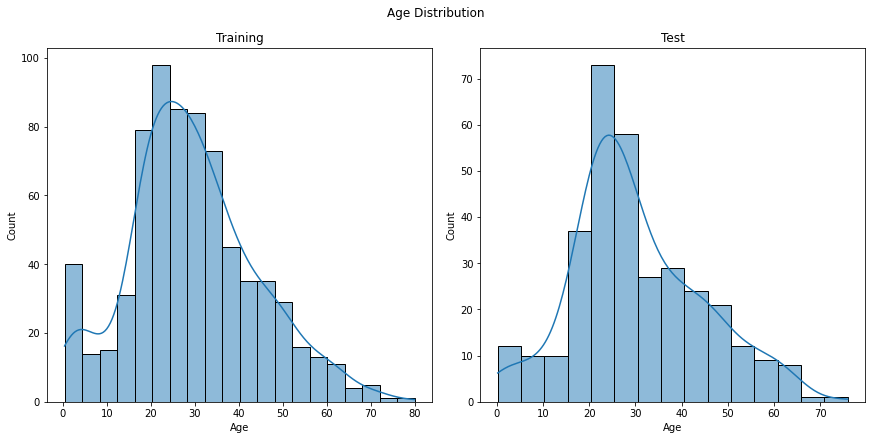

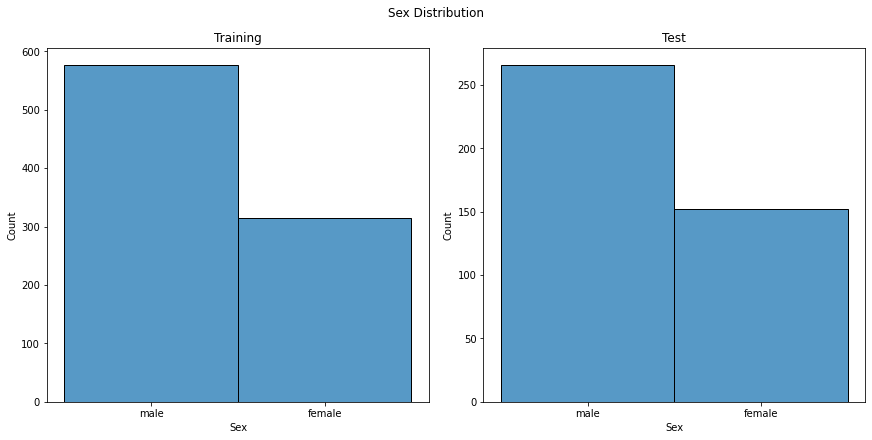

In [27]:
# Distribution Age
distrib_plot('Age Distribution', 'Age', True)

# Distribution Sex
distrib_plot('Sex Distribution', 'Sex', False)

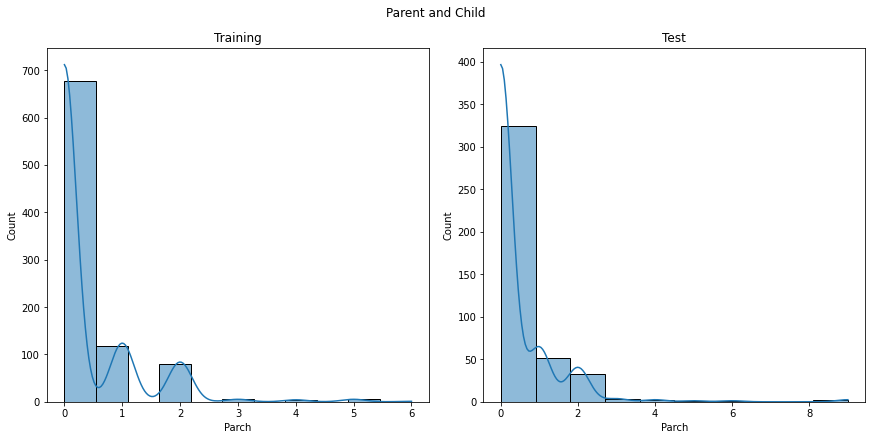

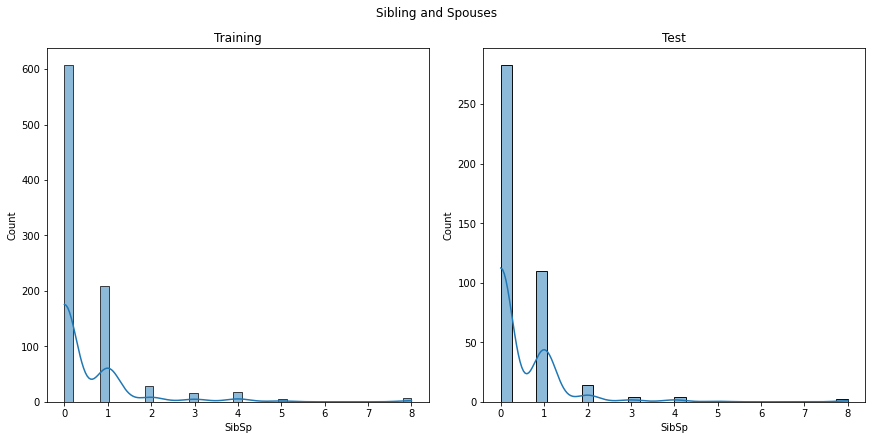

In [26]:
# Distribution Parent and Child
distrib_plot('Parent and Child', 'Parch', True)

# Distribution Siblings and Spouses
distrib_plot('Sibling and Spouses', 'SibSp', True)

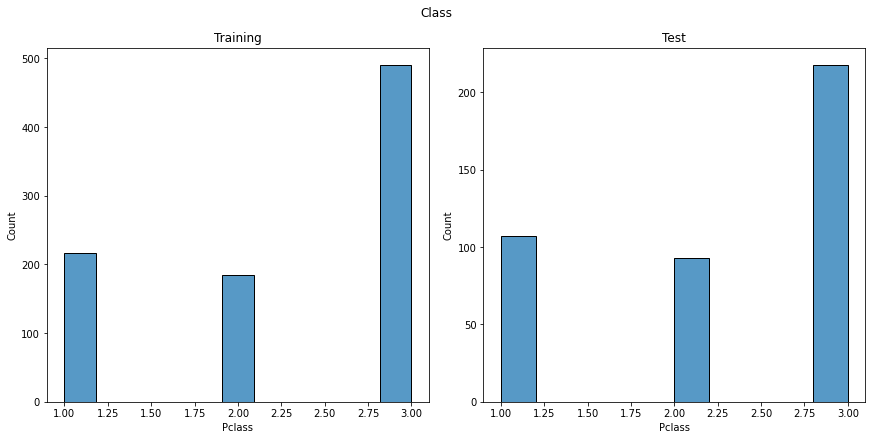

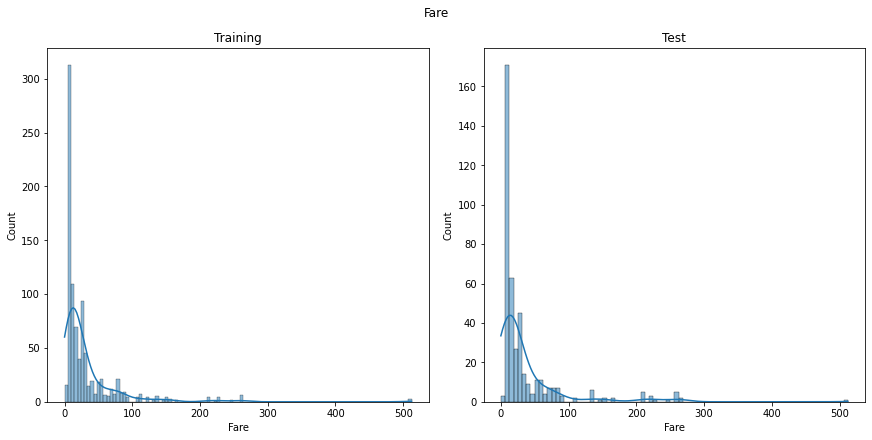

In [29]:
# Distribution Class
distrib_plot('Class', 'Pclass', False)

# Distribution Fare
distrib_plot('Fare', 'Fare', True)